# Letter Recognition - First Steps

In [18]:
# import idx2numpy for extraction of image data (plus numpy and matplotlib)
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [50]:
#read mapping file as dataframe
mapping = pd.read_csv("data/emnist-balanced-mapping.txt", sep=" ", header=None)
mapping = mapping.rename(columns={0: "label", 1: "ascii"})

In [53]:
#add "translated" label as "char" variable
mapping.loc[:, "char"] = mapping.ascii.apply(chr)

In [54]:
mapping

,label,ascii,char
0,0,48,0
1,1,49,1
2,2,50,2
3,3,51,3
4,4,52,4
5,5,53,5
6,6,54,6
7,7,55,7
8,8,56,8
9,9,57,9


In [58]:
#use idx method convert_from_file() for extraction into array - separate for train and test
train_img = idx2numpy.convert_from_file("data/emnist-balanced-train-images-idx3-ubyte")
test_img = idx2numpy.convert_from_file("data/emnist-balanced-test-images-idx3-ubyte")


In [59]:
#same for the labels files
train_lab = idx2numpy.convert_from_file("data/emnist-balanced-train-labels-idx1-ubyte")
test_lab = idx2numpy.convert_from_file("data/emnist-balanced-test-labels-idx1-ubyte")

In [60]:
#normalize image data and reshape image data for the channels dimension

train_img = np.reshape(train_img, (-1, 28, 28, 1))/255
test_img = np.reshape(test_img, (-1, 28, 28, 1))/255

In [70]:
#encode the label data
from tensorflow.keras.utils import to_categorical
train_lab_enc = to_categorical(train_lab)
test_lab_enc = to_categorical(test_lab)

# First Model

In [63]:
from tensorflow.keras import layers
from tensorflow.keras import models

2023-07-12 14:56:31.945546: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-12 14:56:32.449188: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-12 14:56:32.449237: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-07-12 14:56:32.508272: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-07-12 14:56:34.030844: W tensorflow/stream_executor/platform/de

In [64]:
#set up model via function
def initialize_model():

    model = models.Sequential()

    ### First Convolution & MaxPooling
    model.add(layers.Conv2D(8, (4,4), input_shape=(28,28,1), activation="relu", padding="same"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    model.add(layers.Conv2D(16, (3,3), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(47, activation="relu"))
    
    model.add(layers.Dense(47, activation="softmax"))
    
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    
    return model

In [65]:
from tensorflow.keras.callbacks import EarlyStopping

In [66]:
es = EarlyStopping(patience=20, restore_best_weights=True)

In [67]:
mod = initialize_model()

2023-07-12 15:03:36.771684: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-07-12 15:03:36.772113: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-07-12 15:03:36.772451: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-VTQ1TRPN): /proc/driver/nvidia/version does not exist
2023-07-12 15:03:36.773629: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [71]:
mod.fit(train_img, train_lab_enc, validation_split=0.2, callbacks=[es], epochs=5, batch_size=32)

Epoch 1/5


2023-07-12 15:08:44.974161: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 282992640 exceeds 10% of free system memory.


2820/2820 [==============================] - 23s 8ms/step - loss: 0.9549 - accuracy: 0.7105 - val_loss: 0.5908 - val_accuracy: 0.8050
Epoch 2/5
2820/2820 [==============================] - 23s 8ms/step - loss: 0.5389 - accuracy: 0.8210 - val_loss: 0.5059 - val_accuracy: 0.8277
Epoch 3/5
2820/2820 [==============================] - 23s 8ms/step - loss: 0.4676 - accuracy: 0.8419 - val_loss: 0.4649 - val_accuracy: 0.8403
Epoch 4/5
2820/2820 [==============================] - 23s 8ms/step - loss: 0.4288 - accuracy: 0.8535 - val_loss: 0.4402 - val_accuracy: 0.8477
Epoch 5/5
2820/2820 [==============================] - 25s 9ms/step - loss: 0.4013 - accuracy: 0.8633 - val_loss: 0.4168 - val_accuracy: 0.8567


In [73]:
test_pred = mod.predict(test_img)

588/588 [==============================] - 2s 3ms/step


In [75]:
test_pred.shape

(18800, 47)

In [88]:
pred_cat = np.argmax(test_pred, axis=1)

In [89]:
pred_cat.shape

(18800,)

In [90]:
pred_cat

array([41, 39,  9, ...,  1, 26, 33])

In [91]:
from sklearn.metrics import accuracy_score

In [92]:
accuracy_score(test_lab, pred_cat)

0.8567021276595744

In [93]:
mod.evaluate(test_img, test_lab_enc)

588/588 [==============================] - 2s 3ms/step - loss: 0.4361 - accuracy: 0.8567


[0.4360896944999695, 0.8567021489143372]

# Some generated images as input

In [95]:
from PIL import Image

In [99]:
gen_A = Image.open("data/A_a.png")

In [100]:
gen_A = gen_A.convert("1")

In [107]:
arr_A = np.asarray(gen_A)

In [108]:
arr_A.shape

(28, 28)

In [143]:
#invert arr_A
arr_A = (arr_A-255)*-1
#reshape and normalize arr_A
arr_A = arr_A.reshape((1,28,28,1))/255

In [144]:
arr_A.shape

(1, 28, 28, 1)

In [145]:
pred_A = np.argmax(mod.predict(arr_A))

1/1 [==============================] - 0s 25ms/step


In [146]:
pred_A

26

In [147]:
mapping.loc[26, "char"]

'Q'

In [148]:
pred_A = mod.predict(arr_A)

1/1 [==============================] - 0s 22ms/step


In [149]:
pred_A

array([[6.6326029e-04, 7.4173717e-05, 9.9955389e-05, 2.5656116e-06,
        3.5539558e-04, 1.4878850e-03, 2.8916913e-05, 5.6049334e-06,
        7.7138175e-03, 2.4833642e-03, 1.1498494e-02, 4.2719394e-02,
        8.4145904e-05, 1.9195047e-04, 6.6637723e-03, 1.3358437e-02,
        6.7784980e-02, 1.3682491e-04, 1.6739122e-04, 3.7074919e-05,
        4.6927115e-04, 3.9303115e-05, 1.6515423e-03, 5.8274221e-05,
        3.7435739e-04, 5.2402602e-03, 5.9666514e-01, 3.0310489e-02,
        5.4458109e-05, 5.1859015e-06, 3.7092305e-04, 6.1757164e-05,
        2.3993629e-04, 1.4829509e-05, 2.3776107e-05, 1.8740768e-05,
        2.1675237e-02, 2.1169344e-05, 1.3038841e-03, 8.0926425e-04,
        5.4037948e-03, 1.1075840e-01, 2.7548601e-06, 1.3965247e-05,
        6.8779275e-02, 4.2606584e-06, 7.2359500e-05]], dtype=float32)

In [150]:
max(pred_A)

array([6.6326029e-04, 7.4173717e-05, 9.9955389e-05, 2.5656116e-06,
       3.5539558e-04, 1.4878850e-03, 2.8916913e-05, 5.6049334e-06,
       7.7138175e-03, 2.4833642e-03, 1.1498494e-02, 4.2719394e-02,
       8.4145904e-05, 1.9195047e-04, 6.6637723e-03, 1.3358437e-02,
       6.7784980e-02, 1.3682491e-04, 1.6739122e-04, 3.7074919e-05,
       4.6927115e-04, 3.9303115e-05, 1.6515423e-03, 5.8274221e-05,
       3.7435739e-04, 5.2402602e-03, 5.9666514e-01, 3.0310489e-02,
       5.4458109e-05, 5.1859015e-06, 3.7092305e-04, 6.1757164e-05,
       2.3993629e-04, 1.4829509e-05, 2.3776107e-05, 1.8740768e-05,
       2.1675237e-02, 2.1169344e-05, 1.3038841e-03, 8.0926425e-04,
       5.4037948e-03, 1.1075840e-01, 2.7548601e-06, 1.3965247e-05,
       6.8779275e-02, 4.2606584e-06, 7.2359500e-05], dtype=float32)

In [116]:
mapping

,label,ascii,char
0,0,48,0
1,1,49,1
2,2,50,2
3,3,51,3
4,4,52,4
5,5,53,5
6,6,54,6
7,7,55,7
8,8,56,8
9,9,57,9


In [130]:
gen_U = Image.open("data/U_u.png")
gen_U = gen_U.convert("L")

In [139]:
arr_U = np.asarray(gen_U)
#invert from negative
arr_U = (arr_U-255)*-1
arr_U = arr_U.reshape((1,28,28,1))/255

In [140]:
pred_U = mod.predict(arr_U)

1/1 [==============================] - 0s 31ms/step


In [141]:
pred_U

array([[0.00465104, 0.00791541, 0.00672625, 0.00514519, 0.01790562,
        0.05489569, 0.013184  , 0.00302058, 0.00458735, 0.00839075,
        0.01857927, 0.01972551, 0.0311094 , 0.01827581, 0.08443876,
        0.06505007, 0.03752522, 0.01119179, 0.02417816, 0.0465783 ,
        0.02473448, 0.02116613, 0.00385549, 0.0021085 , 0.0053416 ,
        0.00170545, 0.00905883, 0.0053632 , 0.0367593 , 0.02140038,
        0.01352305, 0.0022337 , 0.0437536 , 0.00868644, 0.01236416,
        0.02489154, 0.02652222, 0.02470016, 0.00367737, 0.01115843,
        0.06296834, 0.03527236, 0.02239707, 0.01119805, 0.01857859,
        0.01654105, 0.04696632]], dtype=float32)

In [151]:
pred_U.shape

(1, 47)

In [153]:
pred_U.argmax(axis=1)

array([14])

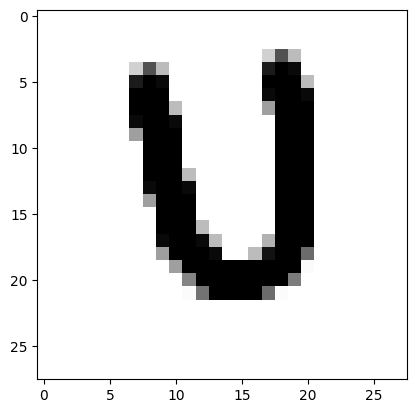

In [138]:
plt.imshow((arr_U.reshape((28,28))-255)*-1, cmap="Greys")

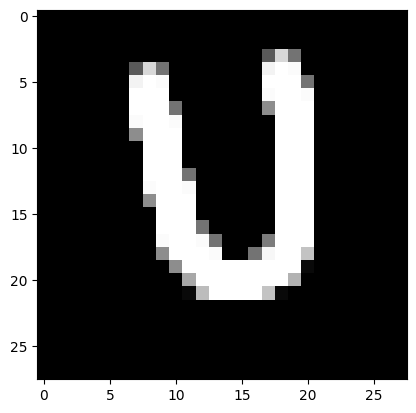

In [132]:
plt.imshow(arr_U.reshape((28,28)), cmap="Greys")

In [133]:
rgb_A = Image.open("data/A_a.png")

In [135]:
arr_rgb_A = np.asarray(rgb_A)

In [136]:
arr_rgb_A.shape

(28, 28, 3)

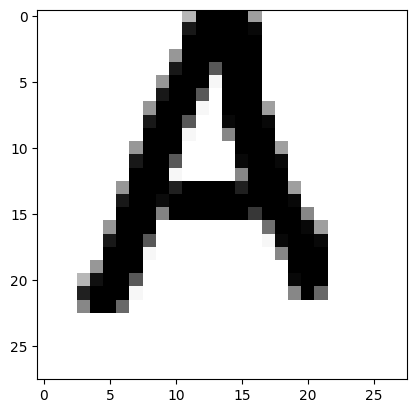

In [137]:
plt.imshow(arr_rgb_A)